# Data preparation

## mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## unzip the data

In [2]:
!unzip /content/drive/MyDrive/FinalProject/Mydata.zip -d /content

串流輸出內容已截斷至最後 5000 行。
  inflating: /content/Mydata/images/3MQ99/0046.png  
  inflating: /content/Mydata/images/3MQ99/0047.png  
  inflating: /content/Mydata/images/3MQ99/0048.png  
  inflating: /content/Mydata/images/3MQ99/0049.png  
  inflating: /content/Mydata/images/3MQ99/0050.png  
  inflating: /content/Mydata/images/3MQ99/0051.png  
  inflating: /content/Mydata/images/3MQ99/0052.png  
  inflating: /content/Mydata/images/3MQ99/0053.png  
  inflating: /content/Mydata/images/3MQ99/0054.png  
  inflating: /content/Mydata/images/3MQ99/0055.png  
  inflating: /content/Mydata/images/3MQ99/0056.png  
  inflating: /content/Mydata/images/3MQ99/0057.png  
  inflating: /content/Mydata/images/3MQ99/0058.png  
  inflating: /content/Mydata/images/3MQ99/0059.png  
  inflating: /content/Mydata/images/3MQ99/0060.png  
  inflating: /content/Mydata/images/3MQ99/0061.png  
  inflating: /content/Mydata/images/3MQ99/0062.png  
   creating: /content/Mydata/images/3MR01/
  inflating: /content/Mydata/images

In [3]:
!unzip /content/drive/MyDrive/FinalProject/data.zip -d /content

Archive:  /content/drive/MyDrive/FinalProject/data.zip
   creating: /content/data/
   creating: /content/data/images/
  inflating: /content/data/images/1UP47_2103_2418.png  
  inflating: /content/data/images/1UP47_2103_2418_1.png  
  inflating: /content/data/images/1UP47_2103_2419.png  
  inflating: /content/data/images/1UP47_2103_2419_1.png  
  inflating: /content/data/images/1UP47_2103_2419_3.png  
  inflating: /content/data/images/1UP47_2103_2420.png  
  inflating: /content/data/images/1UP47_2103_2420_1.png  
  inflating: /content/data/images/1UP47_2103_2420_3.png  
  inflating: /content/data/images/1UP47_2103_2420_5.png  
  inflating: /content/data/images/1UP47_2103_2421.png  
  inflating: /content/data/images/1UP47_2103_2421_1.png  
  inflating: /content/data/images/1UP47_2103_2421_5.png  
  inflating: /content/data/images/1UP47_2103_2423_3.png  
  inflating: /content/data/images/1UP47_2103_2423_5.png  
  inflating: /content/data/images/1V857S_2103_6509.png  
  inflating: /content

In [4]:
# !unzip /content/drive/MyDrive/FinalProject/testdata.zip -d /content

In [5]:
!unzip /content/drive/MyDrive/FinalProject/formal_testdata.zip -d /content

Archive:  /content/drive/MyDrive/FinalProject/formal_testdata.zip
   creating: /content/testdata/
   creating: /content/testdata/t1/
  inflating: /content/testdata/t1/neg1.png  
  inflating: /content/testdata/t1/neg10.png  
  inflating: /content/testdata/t1/neg11.png  
  inflating: /content/testdata/t1/neg12.png  
  inflating: /content/testdata/t1/neg13.png  
  inflating: /content/testdata/t1/neg14.png  
  inflating: /content/testdata/t1/neg15.png  
  inflating: /content/testdata/t1/neg16.png  
  inflating: /content/testdata/t1/neg17.png  
  inflating: /content/testdata/t1/neg2.png  
  inflating: /content/testdata/t1/neg3.png  
  inflating: /content/testdata/t1/neg4.png  
  inflating: /content/testdata/t1/neg5.png  
  inflating: /content/testdata/t1/neg6.png  
  inflating: /content/testdata/t1/neg7.png  
  inflating: /content/testdata/t1/neg8.png  
  inflating: /content/testdata/t1/neg9.png  
  inflating: /content/testdata/t1/pos.png  
  inflating: /content/testdata/t1/query.png  
   c

# Training Section

## Import Packages

In [6]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import csv
import os
import random
from torch import nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from PIL import Image

## Argumented functions

In [7]:
# 隨機做資料增量之function
def random_transform(image):

  #整體深度改變
  picked = random.choice([True, False])
  if(picked):
    rand = random.randint(-300, 300)
    to_tensor = transforms.ToTensor()
    image = to_tensor(image)
    image += rand
    to_PIL = transforms.ToPILImage()
    image = to_PIL(image)

  #邊緣小範圍裁切
  picked = random.choice([True, False])
  if(picked):
    random_number = random.randint(285, 295)
    transform = transforms.CenterCrop((random_number, random_number))
    image = transform(image)

  #長寬比小範圍改變
  # picked = random.choice([True, False])
  # if(picked):
  #   random_number = random.randint(285, 295)
  #   transform = transforms.RandomResizedCrop((random_number, random_number))
  #   image = transform(image)

    # 定義目標寬度和高度
    target_width = random.randint(290, 310)
    target_height = random.randint(290, 310)
    # 計算當前圖像的寬度和高度
    current_width, current_height = image.size
    # 計算調整後的寬度和高度
    if current_width / current_height > target_width / target_height:
        # 圖像的寬度比目標寬度大，根據目標高度計算新的寬度
        new_width = int(target_height * (current_width / current_height))
        new_height = target_height
    else:
        # 圖像的寬度比目標寬度小，根據目標寬度計算新的高度
        new_width = target_width
        new_height = int(target_width * (current_height / current_width))
    # 調整圖像大小以適應新的寬度和高度
    resized_image = image.resize((new_width, new_height))
    # 計算裁剪區域的邊界
    left = (new_width - target_width) // 2
    top = (new_height - target_height) // 2
    right = left + target_width
    bottom = top + target_height
    # 裁剪圖像
    image = resized_image.crop((left, top, right, bottom))

  #雜訊(高斯雜訊或少量鹽噪點)
  picked = random.choice([True, False])
  if(picked):
    transform = transforms.GaussianBlur(7,2)
    image = transform(image)


  #平面旋轉(約 15°內)
  picked = random.choice([True, False])
  if(picked):
    transform = transforms.RandomRotation(degrees=(-15, 15))
    image = transform(image)

  #深度傾斜
  picked = random.choice([True, False])
  if(picked):
    transform = transforms.RandomAffine(degrees=0, shear=(-20, 20))
    image = transform(image)

  return image


#將圖片都變成300x300
def resize(image):
  transform = transforms.Compose([transforms.Resize((300, 300))])
  resized_image = transform(image)

  return resized_image

## Test the augmented image

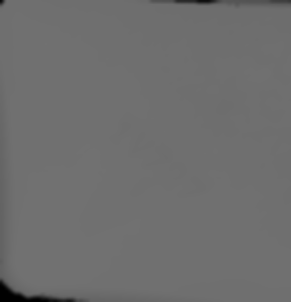

In [8]:
# 測試資料增量之圖片
image = Image.open("/content/Mydata/images/1V727/0017.png")
image = random_transform(image)
image

## CSV file with Anchor, Positive and Negative

In [9]:
# 將標題列寫入CSV檔中
with open("/content/Mydata/train.csv", 'w', newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows([["Anchor", "Positive", "Negative"]])

with open("/content/Mydata/valid.csv", 'w', newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows([["Anchor", "Positive", "Negative"]])

# variables
count = 0
total = 0
limit = float('inf')
pre = ""
valid_data = False

# 計算總資料數量
DATA_DIR = '/content/Mydata/images/'
for root, dirs, files in os.walk(DATA_DIR):
  for file in files:
    total += 1

# 做資料增量 + 將檔名寫入CSV檔
for root, dirs, files in os.walk(DATA_DIR):
  for file in files:
    file_path = os.path.join(root, file) #檔案路徑
    current_dir = file_path[:-8] #現在處於的資料夾 -> /content/Mydata/images/1UR77/
    current_file_name = file_path[-8:-4] #現在的檔案名稱 -> 0013
    count += 1 #總檔案數量
    
    #產生資料增量之圖片(positive)
    image = Image.open(file_path)
    augmented_image = random_transform(image)
    positive_path = current_dir + current_file_name + "_pos.png"
    augmented_image.save(positive_path)


    #挑選negative
    file_list = os.listdir(current_dir)
    if len(file_list) <= 1:
      filtered_files = file_list
    else:
      # alternative: file[-8:] != file_path[-8:] and file[-7:] != "pos.png"
      # file[-8:] != file_path[-8:] and file[-12:] != f"{file_path[-8:-4]}_pos.png"
      filtered_files = [file for file in file_list if file[-8:] != file_path[-8:] and file[-7:] != "pos.png"]
    if filtered_files:
      for i in range(len(filtered_files)):
        filtered_files[i] = current_dir[23:] + filtered_files[i]


    #判斷要寫入 train data 還是 valid data
    if count > 50000 and pre[23:29] != file_path[23:29]:
      valid_data = True


    #將檔案寫入CSV檔中
    for i in range(len(filtered_files)):
      if valid_data:
        with open("/content/Mydata/valid.csv", 'a', newline="") as csvfile:
          writer = csv.writer(csvfile)
          writer.writerows([[file_path[23:], positive_path[23:], filtered_files[i]]])
      else:
        with open("/content/Mydata/train.csv", 'a', newline="") as csvfile:
          writer = csv.writer(csvfile)
          writer.writerows([[file_path[23:], positive_path[23:], filtered_files[i]]])

    pre = file_path

    #tdqm
    print('\r' + 'Augmenting images progressing :[%s%s]%.2f%%;' % (
    '█' * int(count*20/total), ' ' * (20-int(count*20/total)),
    float(count/total*100)), end='')

  if count > limit:
    break

Augmenting images progressing :[████████████████████]100.00%;

In [10]:
#定義相關路徑
DATA_DIR = '/content/Mydata/images/'
TRAIN_CSV_FILE = '/content/Mydata/train.csv'
VALID_CSV_FILE = '/content/Mydata/valid.csv'

#定義batch size
BATCH_SIZE = 16

#定義執行裝置和model儲存路徑
DEVICE = 'cuda'
MODEL_PATH = '/content/drive/MyDrive/best_model.pt'

In [11]:
#從CSV檔案載入train data
train_df = pd.read_csv(TRAIN_CSV_FILE)
train_df = train_df.sample(n=10000, replace=True, random_state=1)
train_df.head()

,Anchor,Positive,Negative
128037,2GW05S/0019.png,2GW05S/0019_pos.png,2GW05S/0001.png
491755,3MS77S/0011.png,3MS77S/0011_pos.png,3MS77S/0001.png
491263,2GS81/0007.png,2GS81/0007_pos.png,2GS81/0014.png
836489,2H736/0003.png,2H736/0003_pos.png,2H736/0050.png
73349,1V975/0007.png,1V975/0007_pos.png,1V975/0002.png


In [12]:
#從CSV檔案載入valid data
valid_df = pd.read_csv(VALID_CSV_FILE)
valid_df = valid_df.sample(n=3000, replace=True, random_state=1)
valid_df.head()

,Anchor,Positive,Negative
128037,2H020/0035.png,2H020/0035_pos.png,2H020/0015.png
491755,1X572/0048.png,1X572/0048_pos.png,1X572/0018.png
470924,3MR92/0053.png,3MR92/0053_pos.png,3MR92/0037.png
791624,2H784/0057.png,2H784/0057_pos.png,2H784/0037.png
491263,1X572/0017.png,1X572/0017_pos.png,1X572/0003.png


## Visualizaition of Anchor, Positive and Negative

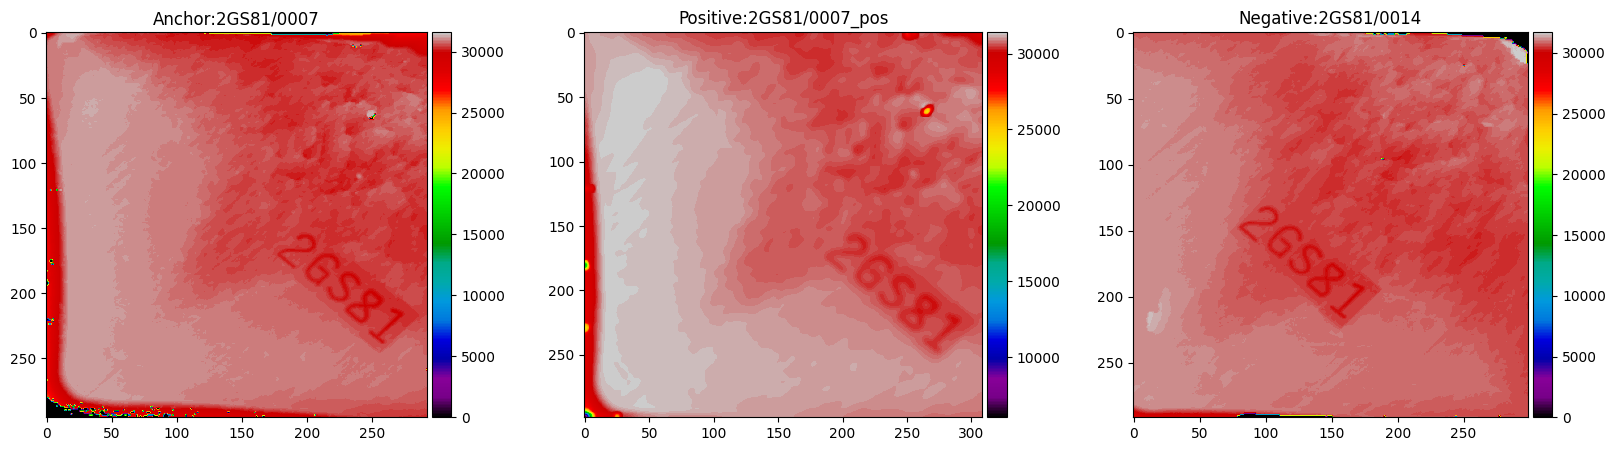

In [35]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

#測試資料
row = train_df.iloc[2]

#分別讀取Anchor, Positive, Negative的資料
A_img = cv2.imread(DATA_DIR + row.Anchor, -1)
P_img = cv2.imread(DATA_DIR + row.Positive, -1)
N_img = cv2.imread(DATA_DIR + row.Negative, -1)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 5))

#顯示anchor
ax1.set_title(f"Anchor:{row.Anchor.split('.')[0]}")
im1 = ax1.imshow(A_img, cmap = 'nipy_spectral')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
f.colorbar(im1, cax=cax, orientation='vertical')

#顯示positive
ax2.set_title(f"Positive:{row.Positive.split('.')[0]}")
im2 = ax2.imshow(P_img, cmap = 'nipy_spectral')
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
f.colorbar(im2, cax=cax, orientation='vertical')

#顯示negative
ax3.set_title(f"Negative:{row.Negative.split('.')[0]}")
im3 = ax3.imshow(N_img, cmap = 'nipy_spectral')
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
f.colorbar(im3, cax=cax, orientation='vertical')

## Dataset and Dataloader

In [36]:
#定義dataset class
class dataset(Dataset):
  def __init__(self, df):
    self.df = df
  def __len__(self):
    return len(self.df)
  def __getitem__(self, idx):
    row = self.df.iloc[idx]
    A_img = torch.from_numpy(cv2.imread(DATA_DIR + row.Anchor, -1).astype(np.int32)).unsqueeze(2).permute(2, 0, 1) / 65535.0
    P_img = torch.from_numpy(cv2.imread(DATA_DIR + row.Positive, -1).astype(np.int32)).unsqueeze(2).permute(2, 0, 1) / 65535.0
    N_img = torch.from_numpy(cv2.imread(DATA_DIR + row.Negative, -1).astype(np.int32)).unsqueeze(2).permute(2, 0, 1) / 65535.0
    A_img = resize(A_img)
    P_img = resize(P_img)
    N_img = resize(N_img)
    return A_img, P_img, N_img

In [37]:
#將資料集載入dataset
trainset = dataset(train_df) # train_df[:20000]
validset = dataset(valid_df) # valid_df[:4000]

#顯示 trainset 和 validset 的數量
print(f'Number of trainset : {len(trainset)}')
print(f'Number of validset : {len(validset)}')

Number of trainset : 10000
Number of validset : 3000


In [38]:
#將dataset載入dataloader
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
validloader = DataLoader(validset, batch_size=BATCH_SIZE)

In [39]:
#顯示 trainloader 和 validloader 的數量
print(f"Number of batches in trainloader : {len(trainloader)}")
print(f"Number of batches in validloader : {len(validloader)}")

Number of batches in trainloader : 625
Number of batches in validloader : 188


In [40]:
#顯示一個batch的資料shape
for A, P, N in trainloader:
  break
    
print(f"Image batch shape : {A.shape}")

Image batch shape : torch.Size([16, 1, 300, 300])


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


## Model 

In [41]:
#定義model class
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.prelayer = nn.Conv2d(1, 3, kernel_size=1, bias=False)
    self.net = torchvision.models.resnet50()
  def forward(self, images):
    images = self.net(self.prelayer(images))
    return images

In [42]:
#建立model object
model = Model()
model.to(DEVICE)

Model(
  (prelayer): Conv2d(1, 3, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (net): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (re

## Train and Evaluation Function

In [43]:
#計算兩個embedded vector的距離
def batch_dist(a_emb, b_emb):
  dist = a_emb - b_emb
  dist = np.dot(dist, dist.T)
  dist[dist < 0] = 0
  dist = np.diag(np.sqrt(dist))
  return dist

In [44]:
#訓練之function
def train(model, loader, optimizer, criterion):
  total_loss = 0.0
  total_eval = 0
  total_corr = 0
  for A, P, N in tqdm(loader):
    A = A.to(DEVICE); P = P.to(DEVICE); N = N.to(DEVICE)
    A_embs = model(A)
    P_embs = model(P)
    N_embs = model(N)

    ap_dist = batch_dist(A_embs.cpu().detach().numpy(), P_embs.cpu().detach().numpy()) # anchor和positive之間的距離(要最大化)
    an_dist = batch_dist(A_embs.cpu().detach().numpy(), N_embs.cpu().detach().numpy()) # anchor和negative之間的距離
    total_eval += len(ap_dist)
    corr = np.count_nonzero(ap_dist < an_dist)
    total_corr += corr

    loss = criterion(A_embs, P_embs, N_embs)
    total_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()    
  return total_loss/len(loader), round(total_corr/total_eval, 7)*100

In [45]:
#valid function
def eval(model, loader, criterion):
  total_loss = 0.0
  total_eval = 0
  total_corr = 0
  with torch.no_grad():
    for A, P, N in tqdm(loader):
      A = A.to(DEVICE); P = P.to(DEVICE); N = N.to(DEVICE)
      A_embs = model(A)
      P_embs = model(P)
      N_embs = model(N)

      ap_dist = batch_dist(A_embs.cpu().detach().numpy(), P_embs.cpu().detach().numpy()) # anchor和positive之間的距離(要最大化)
      an_dist = batch_dist(A_embs.cpu().detach().numpy(), N_embs.cpu().detach().numpy()) # anchor和negative之間的距離
      total_eval += len(ap_dist)
      corr = np.count_nonzero(ap_dist < an_dist) #使得錨點樣本(anchor)和正樣本(positive)之間的距離比正樣本(positive)和負樣本(negative)還小
      total_corr += corr

      loss = criterion(A_embs, P_embs, N_embs)
      total_loss += loss.item()
    return total_loss/len(loader), round(total_corr/total_eval, 7)*100

In [46]:
criterion = nn.TripletMarginLoss() # loss function
optimizer = torch.optim.Adam(model.parameters()) # optimizer

## Training

In [47]:
best_valid_acc = 0
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

EPOCHS = 5

for idx in range(EPOCHS):
  print(f'EPOCH : {idx+1}')
  #訓練training data
  loss, acc = train(model, trainloader, optimizer, criterion)
  train_loss.append(loss)
  train_acc.append(acc)

  #訓練valid data
  loss, acc = eval(model, validloader, criterion)
  valid_loss.append(loss)
  valid_acc.append(acc)

  #若新的準確率比目前最好的還高，則更新best_valid_acc
  if valid_acc[-1] > best_valid_acc:
    torch.save(model.state_dict(), MODEL_PATH)
    best_valid_acc = valid_acc[-1]
    print('[WEIGHTS SAVED]')
  print(f'train_loss : {train_loss[-1]} valid_loss : {valid_loss[-1]}')
  print(f'train_acc : {train_acc[-1]}% valid_acc : {valid_acc[-1]}%\n')

EPOCH : 1


100%|██████████| 188/188 [01:17<00:00,  2.44it/s]


[WEIGHTS SAVED]
train_loss : 0.9414058455228805 valid_loss : 0.2702511450711717
train_acc : 89.11% valid_acc : 93.30000000000001%

EPOCH : 2


100%|██████████| 188/188 [01:16<00:00,  2.44it/s]


[WEIGHTS SAVED]
train_loss : 0.13825388845205308 valid_loss : 0.20422357079037962
train_acc : 96.58% valid_acc : 94.8%

EPOCH : 3


100%|██████████| 188/188 [01:16<00:00,  2.44it/s]


[WEIGHTS SAVED]
train_loss : 0.12479071687459946 valid_loss : 0.05497013535746868
train_acc : 97.34% valid_acc : 98.4%

EPOCH : 4


100%|██████████| 188/188 [01:16<00:00,  2.44it/s]


[WEIGHTS SAVED]
train_loss : 0.045715463435649875 valid_loss : 0.03226048071333702
train_acc : 98.75% valid_acc : 99.1%

EPOCH : 5


100%|██████████| 188/188 [01:17<00:00,  2.44it/s]

train_loss : 0.01874799406528473 valid_loss : 0.059963318578740384
train_acc : 99.38% valid_acc : 98.73333%



## Training learing curve

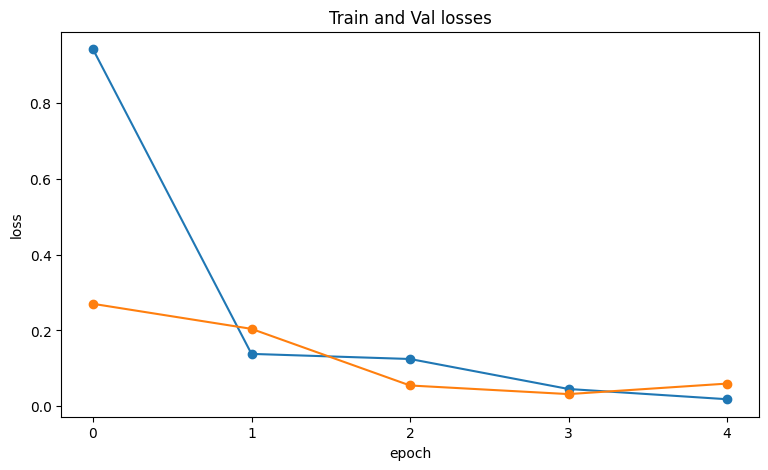

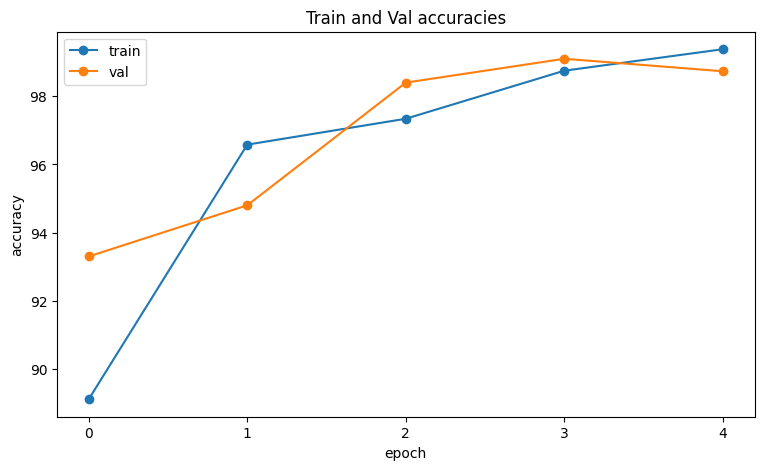

In [57]:
plt.title('Train and Val losses')
plt.plot(train_loss, '-o')
plt.plot(valid_loss, '-o')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xticks([i for i in range(EPOCHS)])
plt.gcf().set_size_inches(9, 5)
plt.show()

plt.title('Train and Val accuracies')
plt.plot(train_acc, '-o')
plt.plot(valid_acc, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xticks([i for i in range(EPOCHS)])
plt.gcf().set_size_inches(9, 5)
plt.show()

# Test Section

## Import Packages

In [49]:
import numpy as np
import cv2
import os
from datetime import datetime, timezone, timedelta
import matplotlib.pyplot as plt
import torch
import torchvision
from torch import nn

## Configuration

In [50]:
DATA_DIR = '/content/testdata/'

DEVICE = 'cuda'
MODEL_PATH = '/content/drive/MyDrive/best_model.pt'

## Model
You can just copy the whole `class Model` in Training Section.

In [51]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.prelayer = nn.Conv2d(1, 3, kernel_size=1, bias=False)
    self.net = torchvision.models.resnet50()
  def forward(self, images):
    images = self.net(self.prelayer(images))
    return images

In [52]:
#建立model object
model = Model()
model.to(DEVICE)
model.load_state_dict(torch.load(MODEL_PATH))

<All keys matched successfully>

## Test

In [53]:
def dist(a_emb, b_emb):
  dist = a_emb - b_emb
  dist = np.dot(dist, dist.T)
  dist[dist < 0] = 0
  dist = np.sqrt(dist)[0][0]
  return dist

In [54]:
def test(model, folder, candidates):
  query_img = torch.from_numpy(cv2.imread(DATA_DIR + folder + 'query.png', -1).astype(np.int32)).unsqueeze(2).permute(2, 0, 1) / 65535.0
  query_img = query_img.unsqueeze(0).to(DEVICE)
  query_emb = model(query_img)
  dists = {}
  for cand in candidates:
    cand_img = torch.from_numpy(cv2.imread(DATA_DIR + folder + cand, -1).astype(np.int32)).unsqueeze(2).permute(2, 0, 1) / 65535.0
    cand_img = cand_img.unsqueeze(0).to(DEVICE)
    cand_emb = model(cand_img)
    dists[cand] = dist(query_emb.cpu().detach().numpy(), cand_emb.cpu().detach().numpy())
  return len(candidates)-1, np.count_nonzero(list(dists.values()) > dists['pos.png'])

In [55]:
testcases = os.listdir(DATA_DIR)
total_eval = 0
total_corr = 0

for testcase in testcases:
  testcase += '/'
  files = os.listdir(DATA_DIR + testcase)
  files.remove('query.png')
  eval, corr = test(model, testcase, files)
  total_eval += eval
  total_corr += corr
tz = timezone(timedelta(hours=+8))
print(f'Current time: {datetime.now(tz)}')
print(f'Number of test cases: {len(testcases)}')
print(f'Test accuracy: {round(total_corr/total_eval, 7)*100}%')

Current time: 2023-05-23 21:05:06.494204+08:00
Number of test cases: 15
Test accuracy: 76.63043%
